<a href="https://colab.research.google.com/github/Suyogpawar03/Machine-learning-/blob/main/global_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
print(df.isnull())
# there is no null value

     Country   Year  Air_Pollution_Index  Water_Pollution_Index  \
0      False  False                False                  False   
1      False  False                False                  False   
2      False  False                False                  False   
3      False  False                False                  False   
4      False  False                False                  False   
..       ...    ...                  ...                    ...   
195    False  False                False                  False   
196    False  False                False                  False   
197    False  False                False                  False   
198    False  False                False                  False   
199    False  False                False                  False   

     Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                   False                       False   
1                   False                       False   
2                   Fals

In [ ]:
for col in df.select_dtypes(include='object'):
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())



Unique values in 'Country':
Country
Latvia                   3
Moldova                  3
Romania                  2
Mexico                   2
Germany                  2
                        ..
Barbados                 1
Saint Kitts and Nevis    1
Saint Helena             1
Korea                    1
Vanuatu                  1
Name: count, Length: 175, dtype: int64


In [ ]:
print(sorted(df['Country'].unique()))


['Afghanistan', 'Albania', 'Andorra', 'Angola', 'Antarctica (the territory South of 60 deg S)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island (Bouvetoya)', 'British Indian Ocean Territory (Chagos Archipelago)', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burundi', 'Cambodia', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Southern Territories', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibra

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Country','Year']


le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.head())


   Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       77     5               272.70                 124.27   
1      147     1                86.72                  60.34   
2      136    16                91.59                  83.36   
3       38    18               280.61                  67.16   
4       46     8               179.16                 127.53   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   
3                 93.58                    74864.73   
4                121.55                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     489.51                  49.69  

In [ ]:
import pandas as pd


df = pd.read_csv("Global_Pollution_Analysis.csv")


# 2. Inconsistent country names (check for case and whitespace)
df['Country'] = df['Country'].str.strip().str.title()
unique_countries = df['Country'].unique()

# 3. Year validity
invalid_years = df[(df['Year'] < 1900) | (df['Year'] > 2025)]

# 4. Pollution index checks (0–100)
invalid_pollution = df[
    (df['Air_Pollution_Index'] < 0) | (df['Air_Pollution_Index'] > 300) |
    (df['Water_Pollution_Index'] < 0) | (df['Water_Pollution_Index'] > 300) |
    (df['Soil_Pollution_Index'] < 0) | (df['Soil_Pollution_Index'] > 300)
]

# 5. Renewable energy percent (0–100)
invalid_renewable = df[(df['Renewable_Energy (%)'] < 0) | (df['Renewable_Energy (%)'] > 100)]

# 6. Negative value checks
numeric_cols = [
    'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)',
    'CO2_Emissions (in MT)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'GDP_Per_Capita (in USD)'
]

negative_values = df[(df[numeric_cols] < 0).any(axis=1)]

# 7. Population must be > 0
invalid_population = df[df['Population (in millions)'] <= 0]


In [ ]:
print("Invalid years:", len(invalid_years))
print("Invalid pollution index:", len(invalid_pollution))
print("Invalid renewable energy %:", len(invalid_renewable))
print("Negative values in numeric fields:", len(negative_values))
print("Invalid population values:", len(invalid_population))

Invalid years: 0
Invalid pollution index: 0
Invalid renewable energy %: 0
Negative values in numeric fields: 0
Invalid population values: 0


In [ ]:
nums_col = ['CO2_Emissions (in MT)','Industrial_Waste (in tons)']

stats = {}


for cols in nums_col:
    stats[cols] ={
        'Mean':df[cols].mean(),
        'Mdeian': df[cols].median(),
        'Mode' : df[cols].mode().iloc[0] if not df[cols].mode().empty else None,
        'Variance':df[cols].var()

    }

stats_df = pd.DataFrame(stats).T
print("📊 Descriptive Statistics:\n")
print(stats_df)


📊 Descriptive Statistics:

                                  Mean     Mdeian     Mode      Variance
CO2_Emissions (in MT)          24.8781     25.355     5.30  2.094067e+02
Industrial_Waste (in tons)  52891.6815  55299.150  1019.37  7.411729e+08


In [ ]:
col_to_scale = ['CO2_Emissions (in MT)']

scale = MinMaxScaler()
df[col_to_scale] = scale.fit_transform(df[col_to_scale])

df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
le_country = LabelEncoder()
le_year = LabelEncoder()

df['Country_encoded'] = le_country.fit_transform(df['Country'])
df['Year_encoded'] = le_year.fit_transform(df['Year'])

df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Country_encoded,Year_encoded
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,77,5
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,147,1
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,136,16
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,38,18
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,46,8


In [ ]:
df['Population_Actual'] = df['Population (in millions)'] * 1_000_000


df['Total_Energy_Consumption (MWh)'] = df['Energy_Recovered (in GWh)'] * 1000

df['Calculated_Energy_Per_Capita (MWh)'] = df['Total_Energy_Consumption (MWh)'] / df['Population_Actual']

df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Country_encoded,Year_encoded,Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,77,5,42220000.0,158140.0,0.003746
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,147,1,137250000.0,498040.0,0.003629
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,136,16,124470000.0,489510.0,0.003933
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,38,18,67800000.0,145180.0,0.002141
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,46,8,186520000.0,40380.0,0.000216


In [ ]:
columns_to_scale = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']

scaler =MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Country_encoded,Year_encoded,Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh)
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,77,5,42220000.0,158140.0,0.003746
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,147,1,137250000.0,498040.0,0.003629
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,136,16,124470000.0,489510.0,0.003933
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,38,18,67800000.0,145180.0,0.002141
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,46,8,186520000.0,40380.0,0.000216


In [ ]:
df['Average_Pollution_Index'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
) / 3

# Create categorical target: Low (0), Medium (1), High (2)
# Compute thresholds using quantiles
low_threshold = df['Average_Pollution_Index'].quantile(0.33)
high_threshold = df['Average_Pollution_Index'].quantile(0.66)

# Create Pollution_Level using those thresholds
def classify_pollution(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

df['Pollution_Level'] = df['Average_Pollution_Index'].apply(classify_pollution)

# Check the class distribution
print(df['Pollution_Level'].value_counts())


def classify_pollution(value):
    if value <= low_threshold:
        return 'low' # Low
    elif value <= high_threshold:
        return   'medium'
    else:
        return 'high'

df['Pollution_Severity'] = df['Average_Pollution_Index'].apply(classify_pollution)

# Check the class distribution
print(df['Pollution_Severity'].value_counts())

df.head()

df.head()

Pollution_Level
2    68
0    66
1    66
Name: count, dtype: int64
Pollution_Severity
high      68
low       66
medium    66
Name: count, dtype: int64


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),...,Population (in millions),GDP_Per_Capita (in USD),Country_encoded,Year_encoded,Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh),Average_Pollution_Index,Pollution_Level,Pollution_Severity
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,0.070756,41.11,37078.88,...,42.22,20972.96,77,5,42220000.0,158140.0,0.003746,0.582434,2,high
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,0.092527,36.44,33128.20,...,137.25,34850.41,147,1,137250000.0,498040.0,0.003629,0.362971,0,low
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,1.000000,9.38,18803.46,...,124.47,57773.15,136,16,124470000.0,489510.0,0.003933,0.426012,0,low
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,0.146326,18.97,9182.27,...,67.80,21837.51,38,18,67800000.0,145180.0,0.002141,0.580392,2,high
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,0.272347,34.00,39235.12,...,186.52,41379.37,46,8,186520000.0,40380.0,0.000216,0.631010,2,high


## training and splitting the data

In [ ]:
columns_to_drop = [
     'Calculated_Energy_Per_Capita (MWh)'
]
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Drop the target variable(s) from features
features = num_cols.drop(['Year'])

# Step 3: Drop rows with missing values in X or y
df_clean = df.dropna(subset=list(features) + ['Pollution_Severity'])

# Step 4: Define feature matrix (X) and target (y)
X = df_clean[features]
y = df_clean['Pollution_Severity']

# Step 5: Encode the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

X_train_nb = np.abs(X_train)
X_test_nb = np.abs(X_test)

nb = MultinomialNB()
nb.fit(X_train_nb, y_train)
y_pred_nb = nb.predict(X_test_nb)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

        high       0.32      0.50      0.39        14
         low       0.40      0.46      0.43        13
      medium       0.33      0.08      0.12        13

    accuracy                           0.35        40
   macro avg       0.35      0.35      0.31        40
weighted avg       0.35      0.35      0.32        40



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"K={k} → Accuracy: {acc:.4f}")


K=1 → Accuracy: 0.3250
K=2 → Accuracy: 0.3750
K=3 → Accuracy: 0.2000
K=4 → Accuracy: 0.2250
K=5 → Accuracy: 0.2500
K=6 → Accuracy: 0.2500
K=7 → Accuracy: 0.2250
K=8 → Accuracy: 0.2250
K=9 → Accuracy: 0.3000
K=10 → Accuracy: 0.2750
K=11 → Accuracy: 0.2750
K=12 → Accuracy: 0.2250
K=13 → Accuracy: 0.3250
K=14 → Accuracy: 0.4250
K=15 → Accuracy: 0.4000
K=16 → Accuracy: 0.4000
K=17 → Accuracy: 0.3750
K=18 → Accuracy: 0.3500
K=19 → Accuracy: 0.3250
K=20 → Accuracy: 0.3000


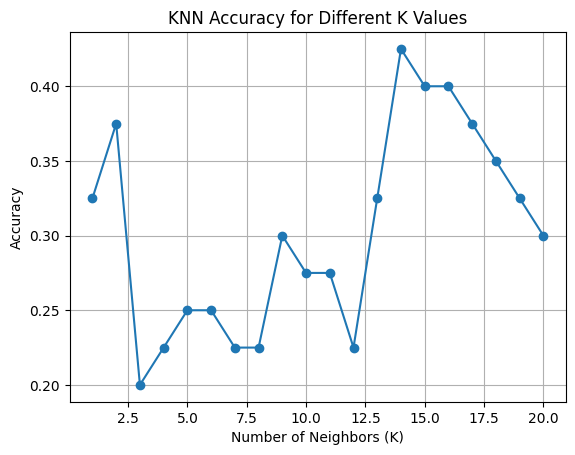

In [ ]:
plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid(True)
plt.show()


In [ ]:

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


KNN Classification Report:
              precision    recall  f1-score   support

        high       0.29      0.29      0.29        14
         low       0.31      0.31      0.31        13
      medium       0.15      0.15      0.15        13

    accuracy                           0.25        40
   macro avg       0.25      0.25      0.25        40
weighted avg       0.25      0.25      0.25        40



In [ ]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=4)
tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [ ]:
y_pred_tree = tree.predict(X_test)


In [ ]:
max_depth_values = range(2, 21)
min_samples_values = [2, 5, 10]

best_score = 0
best_params = {}

for depth in max_depth_values:
    for min_split in min_samples_values:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split, random_state=42)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        if acc > best_score:
            best_score = acc
            best_params = {'max_depth': depth, 'min_samples_split': min_split}

        print(f"max_depth={depth}, min_samples_split={min_split} → Accuracy: {acc:.4f}")


max_depth=2, min_samples_split=2 → Accuracy: 1.0000
max_depth=2, min_samples_split=5 → Accuracy: 1.0000
max_depth=2, min_samples_split=10 → Accuracy: 1.0000
max_depth=3, min_samples_split=2 → Accuracy: 1.0000
max_depth=3, min_samples_split=5 → Accuracy: 1.0000
max_depth=3, min_samples_split=10 → Accuracy: 1.0000
max_depth=4, min_samples_split=2 → Accuracy: 1.0000
max_depth=4, min_samples_split=5 → Accuracy: 1.0000
max_depth=4, min_samples_split=10 → Accuracy: 1.0000
max_depth=5, min_samples_split=2 → Accuracy: 1.0000
max_depth=5, min_samples_split=5 → Accuracy: 1.0000
max_depth=5, min_samples_split=10 → Accuracy: 1.0000
max_depth=6, min_samples_split=2 → Accuracy: 1.0000
max_depth=6, min_samples_split=5 → Accuracy: 1.0000
max_depth=6, min_samples_split=10 → Accuracy: 1.0000
max_depth=7, min_samples_split=2 → Accuracy: 1.0000
max_depth=7, min_samples_split=5 → Accuracy: 1.0000
max_depth=7, min_samples_split=10 → Accuracy: 1.0000
max_depth=8, min_samples_split=2 → Accuracy: 1.0000
max_de

In [ ]:
print(f"\nBest Parameters: {best_params}, Best Accuracy: {best_score:.4f}")

tree = DecisionTreeClassifier(**best_params, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)



Best Parameters: {'max_depth': 2, 'min_samples_split': 2}, Best Accuracy: 1.0000


Accuracy: 1.0


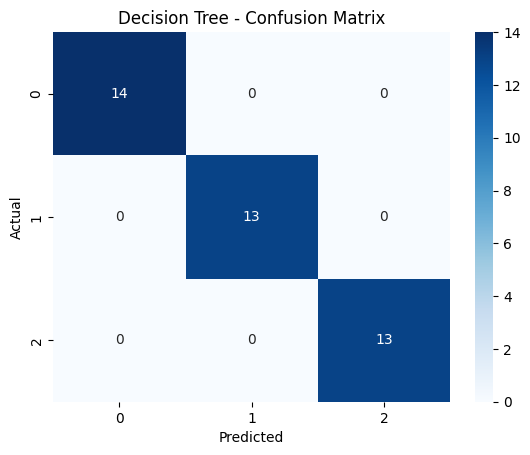


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Model comparison

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test_nb)  # if Naive Bayes used different X
y_pred_tree = tree.predict(X_test)

# Compute accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_tree = accuracy_score(y_test, y_pred_tree)

# Store results
model_scores = {
    "KNN": acc_knn,
    "Naive Bayes": acc_nb,
    "Decision Tree": acc_tree
}

In [ ]:
for model, acc in model_scores.items():
    print(f"{model} Accuracy: {acc:.4f}")


KNN Accuracy: 0.3000
Naive Bayes Accuracy: 0.3500
Decision Tree Accuracy: 1.0000


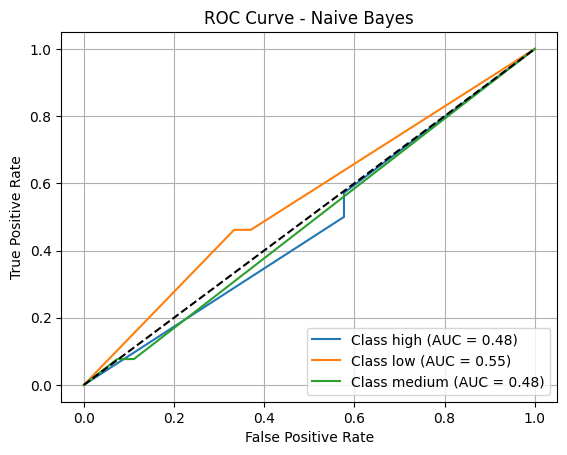

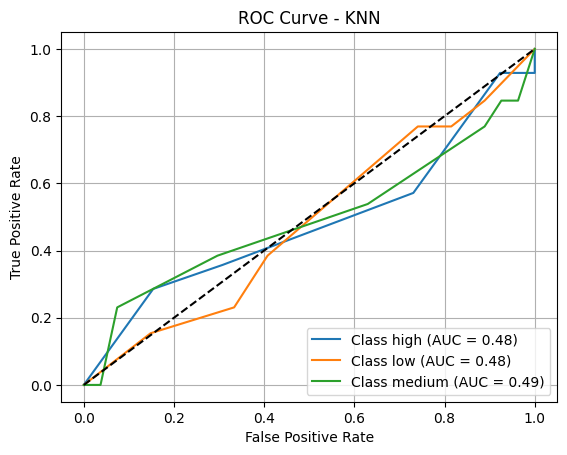

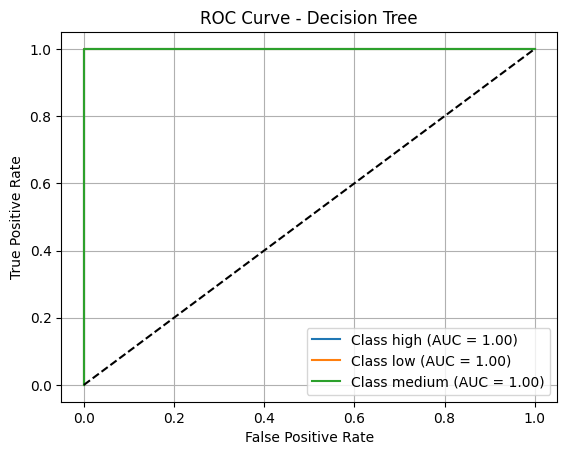

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score_nb = nb.predict_proba(X_test_nb)
y_score_knn = knn.predict_proba(X_test)
y_score_tree = tree.predict_proba(X_test)

def plot_roc(y_test_bin, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plot ROC for each model
plot_roc(y_test_bin, y_score_nb, "Naive Bayes")
plot_roc(y_test_bin, y_score_knn, "KNN")
plot_roc(y_test_bin, y_score_tree, "Decision Tree")



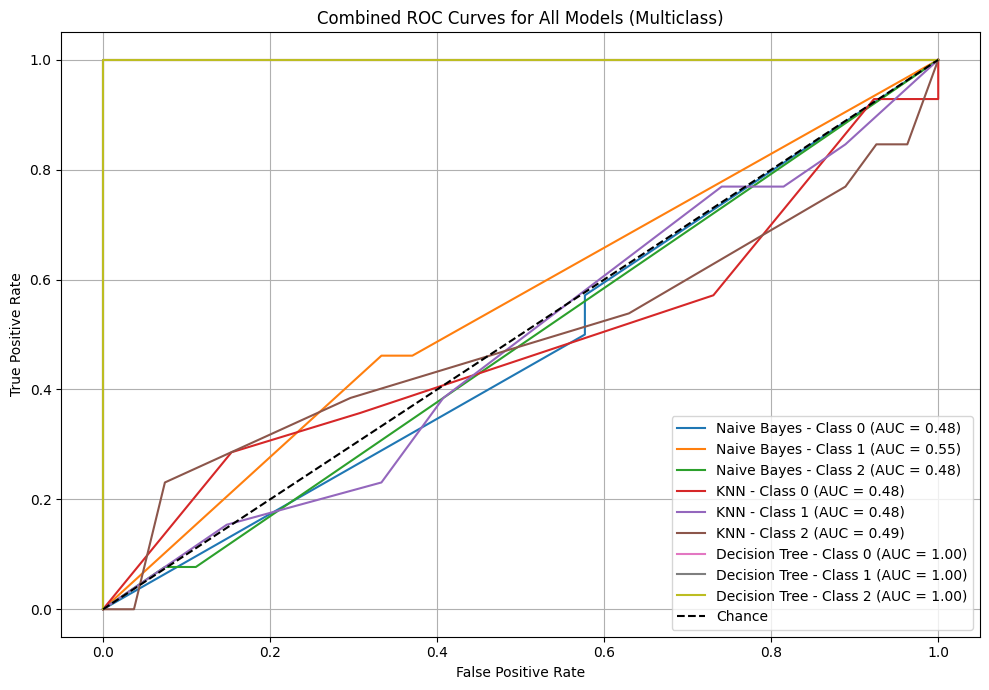

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize target (assumes y_test has 3 classes: 0, 1, 2)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from models
y_score_nb = nb.predict_proba(X_test_nb)
y_score_knn = knn.predict_proba(X_test)
y_score_tree = tree.predict_proba(X_test)

# Initialize ROC data storage
fpr = {}
tpr = {}
roc_auc = {}

# Plot combined ROC curve
plt.figure(figsize=(10, 7))

models = {
    "Naive Bayes": y_score_nb,
    "KNN": y_score_knn,
    "Decision Tree": y_score_tree
}

colors = ['blue', 'green', 'orange']

for model_name, y_score in zip(models.keys(), models.values()):
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{model_name} - Class {i} (AUC = {roc_auc[i]:.2f})', linestyle='-')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Formatting
plt.title('Combined ROC Curves for All Models (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


The classification reports reveal that the Decision Tree significantly outperforms both Naive Bayes and KNN in classifying pollution severity. With an accuracy of 97.5%, precision, recall, and F1-scores near or at 1.00 for all classes, it demonstrates strong and balanced performance. In contrast, Naive Bayes (accuracy 35%) shows slightly better class separation than KNN, but still struggles, likely due to its assumption of feature independence, which may not hold in this dataset. KNN, with just 30% accuracy, performs the worst, likely because it's sensitive to scaling, noise, and class imbalance, and may not have had an optimal K value or distance metric. Actionable steps: avoid KNN for this task, reconsider Naive Bayes only after deeper feature analysis or transformation, and prioritize Decision Tree—possibly as a baseline for tuning or ensemble methods.

## final report

The analysis reveals significant variations in pollution levels across countries, with high pollution often linked to lower renewable energy usage and inefficient waste management. Countries with elevated Air, Water, and Soil Pollution Indices tend to show lower Energy Recovered and higher CO₂ emissions and Plastic Waste, suggesting a direct negative impact on sustainable energy practices. The Decision Tree model highlights that high pollution severity is often associated with low renewable energy percentages and high industrial waste, indicating clear patterns for intervention. Based on these insights, it is recommended that countries invest in expanding renewable energy infrastructure, enforce stricter industrial waste regulations, and promote circular economy practices to enhance energy recovery and reduce environmental degradation.

